<h1><center>CMPE 462 - Project 3 <br>Implementing K-Means & PCA<br>Due: June 14, 2020, 23:59</center></h1>

- **Student ID1:** **2016400249**
- **Student ID2:** **2014400063**
- **Student ID3:** **2009400165**

In [37]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np

In this project, you are going to implement two unsupervised learning techniques. In the first task, you are asked to implement **k-means clustering** algorithm using the data provided in `kmeans_data.zip`. In the second task, you need to implement **PCA** and apply dimensionality reduction on the data provided in `USPS.mat`. 

# (50 pts) Task 1: K-Means Clustering

Please download `kmeans_data.zip`. In this problem, ground truth cluster assignments are given in `labels.npy`. 

## (10 pts) Task 1.1: Plot Clusters

Plot the data using scatter plot. Assign different colors to different classes.

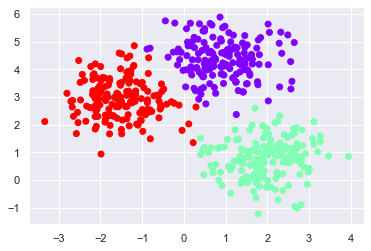

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
import numpy as np
#loading the data into notebook

#loading data to be clustered
cluster_data = np.load("kmeans_data/data.npy")

#loading labels of the data as ground truth
cluster_data_labels = np.load("kmeans_data/label.npy")

#plotting the data with three different colors as different classes that the point is assigned to
plt.scatter(cluster_data[:, 0], cluster_data[:, 1],c=cluster_data_labels,  cmap='rainbow');


## (30 pts) Task 1.2: K-Means Implementation

Implement k-means clustering algorithm by yourself using the number of iterations as the stopping condition. You can use built-in functions only for side-tasks such as norm computation, minimum element search and mean calculation, not for the clustering itself.

In [51]:
#The class KMeansImplementation takes cluster data, labels of the cluster data, number of clusters to cluster,
# max iteration and the random state value.
# fitDataIntoClusters() method runs max_iteration times to cluster data and uses FindInitialCentroids(), findDistance()
# findClassOfTheData() and calculateNewCentroids() methods for that purpose
# returnFinalClustersAndCentroid() function returns the final centroids and the final cluster labels
# calculateSquaredErrorOfIteration() function calculates the squared error as sum of l2-norms of the
# distance between each data point and the centroid of the cluster that the data point assigned
class KMeansImplementation:
    
    def __init__(self, cluster_data,cluster_data_labels, n_clusters =3, max_iteration=9, random_state=1):
        self.n_clusters = n_clusters
        self.max_iteration = max_iteration
        self.random_state = random_state
        self.cluster_data = cluster_data
        self.cluster_data_labels = cluster_data_labels
        self.cluster_info_iterations = {}
         
    #finds n_clusters number of initial centroids to initiate the algorithm
    def FindInitialCentroids(self):
        np.random.seed(self.random_state)
        centroid_indexes = np.random.randint(low=0, high=(self.cluster_data.shape[0]-1), size=self.n_clusters)
        return cluster_data[centroid_indexes]
    
    #finds distance values of each data point to the current centroids
    def findDistance(self,old_centroids):
        distance_array = np.zeros((self.cluster_data.shape[0],self.n_clusters))
        for idx,centroid in enumerate(old_centroids):
            distances = np.linalg.norm(self.cluster_data-centroid, axis=1)
            distance_array[:,idx]=distances
            
        return distance_array

    #finds cluster labels of each data point via choosing the smallest distance 
    #between cluster centroids of all clusters and the data point
    def findClassOfTheData(self,old_centroids):
        
        distances = self.findDistance(old_centroids)
        labels_of_clusters = np.argmin(distances, axis=1)
        return labels_of_clusters
    
    #calculating new centroids of the new clusters after labeling the data points
    def calculateNewCentroids(self,data_label_of_iteration):
        new_centroids = np.zeros((self.n_clusters,self.cluster_data.shape[1]))
        for cluster_id in range(self.n_clusters) :
            cluster_indexes = np.where(data_label_of_iteration==cluster_id)
            cluster_elements = self.cluster_data[cluster_indexes]
            new_centroids[cluster_id]= np.mean(cluster_elements, axis=0)
        
        return new_centroids

    #clustering data
    def fitDataIntoClusters(self):
        
        self.centroids = self.FindInitialCentroids()
        for iteration in range(1,self.max_iteration+1):
            old_centroids = self.centroids
            data_label_of_iteration = self.findClassOfTheData(old_centroids)
            self.centroids = self.calculateNewCentroids(data_label_of_iteration)
            self.cluster_info_iterations[iteration] = {"centroids":old_centroids, "label" :data_label_of_iteration }

    #returns final cluster centroids and final cluster labels of the data points
    def returnFinalClustersAndCentroid(self):
        
        return self.cluster_info_iterations[self.max_iteration]['centroids'],self.cluster_info_iterations[self.max_iteration]['label']
    

    #calculate squared error between data points and centroids of the cluster that is assigned to data
    def calculateSquaredErrorOfIteration(self,iteration_info):
        
        iteration_centroids,iteration_labels = iteration_info['centroids'],iteration_info['label']
        squared_error = 0
        for cluster_num in range(self.n_clusters):
            for data_id,data in enumerate(self.cluster_data):
                membership = int(iteration_labels[data_id]==cluster_num)
                distance = np.linalg.norm(data-iteration_centroids[cluster_num])
                error_value_datum = membership*distance
                squared_error = squared_error + error_value_datum
        return squared_error
                
    #printing errors
    def findConvergencePointOfClustering(self):
        
        for iteration_info_key,iteration_info_key_value in self.cluster_info_iterations.items():
            print("Iteration: %s Squared Error: %s " %(iteration_info_key,self.calculateSquaredErrorOfIteration(iteration_info_key_value)))



In [52]:
#example run
den0 = KMeansImplementation(cluster_data,cluster_data_labels)
den0.fitDataIntoClusters()
den0.returnFinalClustersAndCentroid()
den0.findConvergencePointOfClustering()

Iteration: 1 Squared Error: 749.4427838396194 
Iteration: 2 Squared Error: 507.206217774998 
Iteration: 3 Squared Error: 429.5191883515551 
Iteration: 4 Squared Error: 426.98780215316725 
Iteration: 5 Squared Error: 427.0772093710232 
Iteration: 6 Squared Error: 427.0772093710232 
Iteration: 7 Squared Error: 427.0772093710232 
Iteration: 8 Squared Error: 427.0772093710232 
Iteration: 9 Squared Error: 427.0772093710232 


## (10 pts) Taks 1.3: Evaluation

Run k-means $9$ times with number of iterations $(N)$ $= \{1, 2, ..., 9\}$. Plot the final clustering assignments as a scatter plot for each run as 3x3 `matplotlib subplot`. Visually investigate the effect of the number of iterations on obtaining the optimal clustering and find the convergence point by comparing the plots with the one in Task 1.1. If the model does not converge at $9$ iterations, you can select $9$ other $N$ to effectively show the progress of the clustering.

For a fair comparison, start each run with the same initial random assignments. You can use `np.random.seed(1)` to this purpose.

MAX ITERATION: 1
Iteration: 1 Squared Error: 749.4427838396194 
MAX ITERATION: 2
Iteration: 1 Squared Error: 749.4427838396194 
Iteration: 2 Squared Error: 507.206217774998 
MAX ITERATION: 3
Iteration: 1 Squared Error: 749.4427838396194 
Iteration: 2 Squared Error: 507.206217774998 
Iteration: 3 Squared Error: 429.5191883515551 
MAX ITERATION: 4
Iteration: 1 Squared Error: 749.4427838396194 
Iteration: 2 Squared Error: 507.206217774998 
Iteration: 3 Squared Error: 429.5191883515551 
Iteration: 4 Squared Error: 426.98780215316725 
MAX ITERATION: 5
Iteration: 1 Squared Error: 749.4427838396194 
Iteration: 2 Squared Error: 507.206217774998 
Iteration: 3 Squared Error: 429.5191883515551 
Iteration: 4 Squared Error: 426.98780215316725 
Iteration: 5 Squared Error: 427.0772093710232 
MAX ITERATION: 6
Iteration: 1 Squared Error: 749.4427838396194 
Iteration: 2 Squared Error: 507.206217774998 
Iteration: 3 Squared Error: 429.5191883515551 
Iteration: 4 Squared Error: 426.98780215316725 
Iterati

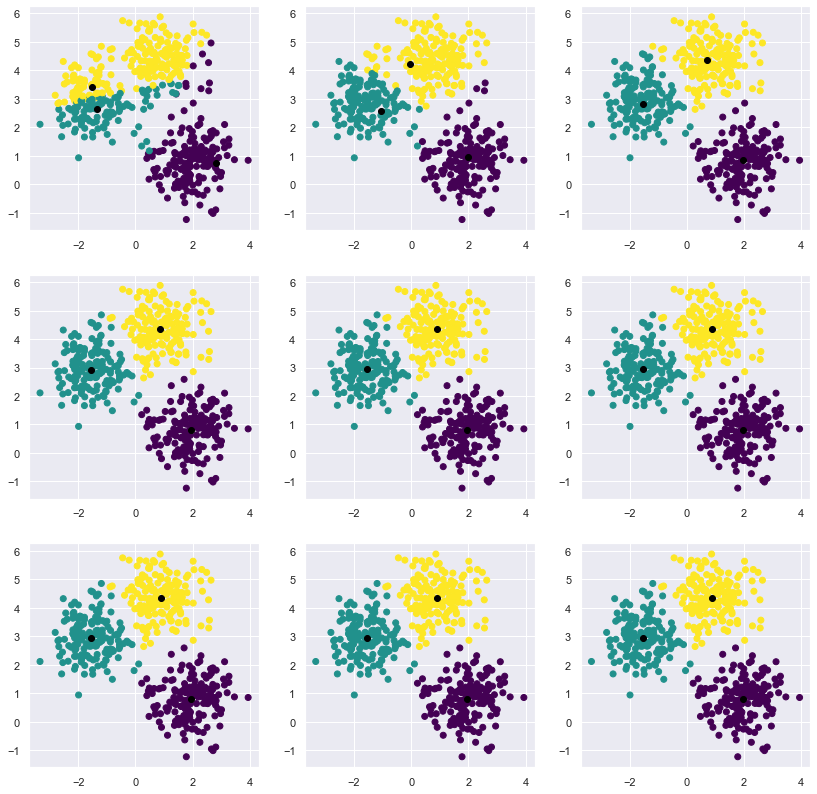

In [53]:
def plot3by3plot(num_of_iter):
    fig = plt.figure(figsize=(14, 14))
    
    for iter_ in range(1,num_of_iter+1):
        print("MAX ITERATION: %s" %iter_)
        plt.subplot(3, 3, iter_)
        kMeansCluster = KMeansImplementation(cluster_data,cluster_data_labels,max_iteration=iter_)
        kMeansCluster.fitDataIntoClusters()
        kMeansCluster.findConvergencePointOfClustering()
        centroids,labels = kMeansCluster.returnFinalClustersAndCentroid()
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1],c=labels,  cmap='viridis')
        plt.scatter(centroids[:, 0], centroids[:, 1], c='black')
    plt.show()
    

plot3by3plot(9)

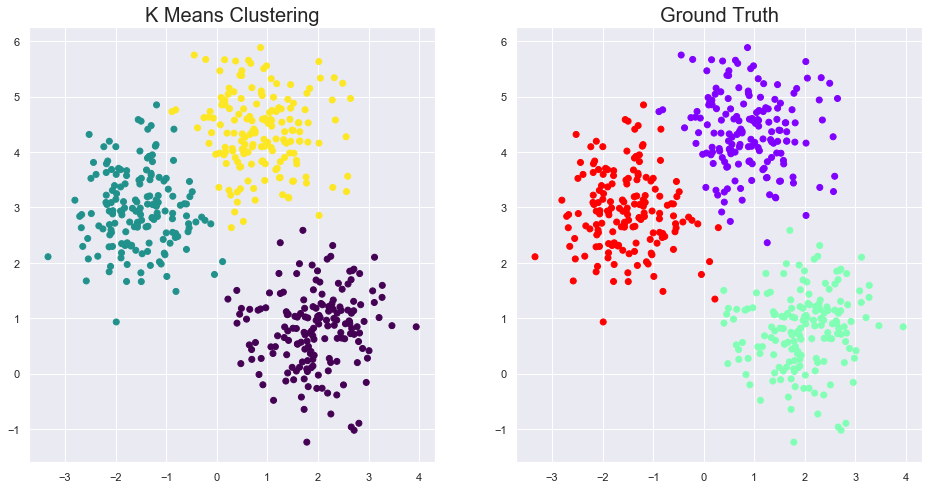

In [50]:
fig = plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
kMeansCluster = KMeansImplementation(cluster_data,cluster_data_labels,max_iteration=9)
kMeansCluster.fitDataIntoClusters()
centroids,labels = kMeansCluster.returnFinalClustersAndCentroid()
plt.scatter(cluster_data[:, 0], cluster_data[:, 1],c=labels,  cmap='viridis')
plt.title("K Means Clustering",fontsize=20)
plt.subplot(1,2,2)
plt.title("Ground Truth",fontsize=20)
plt.scatter(cluster_data[:, 0], cluster_data[:, 1],c=cluster_data_labels, cmap="rainbow");

# (50 pts) Task 2: Principal Component Analysis (PCA)

Please load the whole dataset in `USPS.mat` using the function `loadmat` in `Scipy.io`. The matrix $A$ contains all the images of size 16 by 16. Each of the 3000 rows in $A$ corresponds to the image of one handwritten digit (between 0 and 9).

## (30 pts) Task 2.1: PCA Implementation

Implement PCA and apply it to the data using $d = 50, 100, 200, 300$ principal components. You are not allowed to use an existing implementation. You can use existing packages for eigen-decomposition. **Do not forget to standardize the data before eigen-decomposition.**

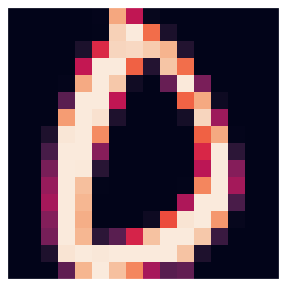

In [43]:
data=sio.loadmat("USPS.mat")
mats=data["A"]
fig=plt.figure(figsize=(5,5))
ax=fig.gca()
# Hide grid lines
ax.grid(False)
# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
plt.imshow(mats[42].reshape(16,16))
X=(mats-np.mean(mats))
#Get the covariance matrix
covMat=X.transpose().dot(X)
#Find the eigenvectors
l,v = np.linalg.eig(covMat)

## (15 pts) Task 2.2: Image Reconstruction

Reconstruct images using the selected principal components from Task 2.1

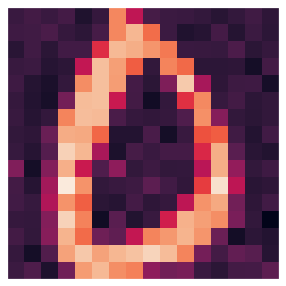

In [44]:
# Returns reconstructions of given image matrix using dim eigenvectors
def reconstructImage(X, v, dim=240):
    G=v[0:dim].transpose()
    ret=G.dot(G.transpose().dot(X.transpose())).transpose()
    return ret

# Reconstruct some of the images
rec=reconstructImage(X[0:43],v)
fig=plt.figure(figsize=(5,5))
ax=fig.gca()
# Hide grid lines
ax.grid(False)
# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
plt.imshow(rec[-1].reshape(16,16))

## (5 pts) Task 2.3: Evaluation

Visualize the reconstructed images for the images at indices $i = 0, 500, 1000, 2000$ for $d=50, 100, 200, 300$. Create a 4x5 subplot where the rows correspond to images at each index, first four columns correspond to reconstructed images using each $d$ and the last column is the raw image, i.e. before PCA. Comment on your results.

In [45]:
indices=[0,500,1000,2000]
dimensions=[50,100,200,256]
return_images=[]
for d in dimensions:
    return_images.append(reconstructImage(X[indices],v,dim=d).reshape((len(indices),16,16)))
    
return_images.append(X[indices].reshape((len(indices),16,16)))

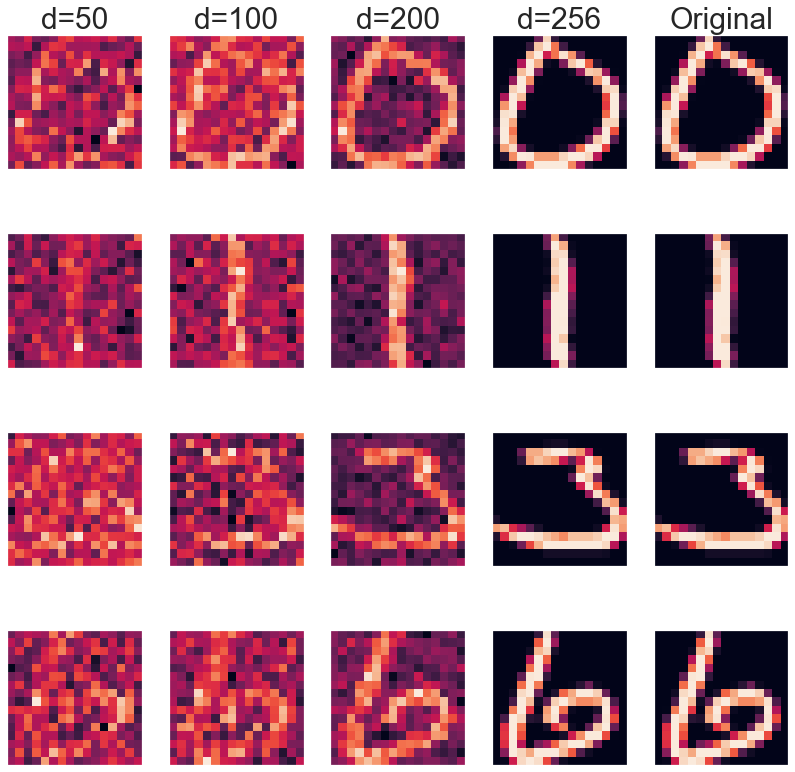

In [46]:
fig = plt.figure(figsize=(14, 14))


for r in range(0,len(indices)):
    for c in range(0,len(dimensions)+1):
        plt.subplot(len(indices),len(dimensions)+1,r*(len(indices)+1)+c+1)
        if r==0:
            if c<len(dimensions):
                plt.title("d="+str(dimensions[c]), fontsize=30)
            else:
                plt.title("Original", fontsize=30)
        ax = fig.gca()
        # Hide grid lines
        ax.grid(False)
        # Hide axes ticks
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(return_images[c][r])
plt.show()

We see that using more principal components result in better recovery of the data. We see that using all the principal components results in full recovery of the data.